In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('wine_data.csv' ,header= None,names = ['Class label' , 'Alcohol' , 'Malic Acid'], usecols = [0,1,2])

In [9]:
data.shape

(178, 3)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [11]:
data.describe()

,Class label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


In [12]:
data.isna().sum()

Class label    0
Alcohol        0
Malic Acid     0
dtype: int64

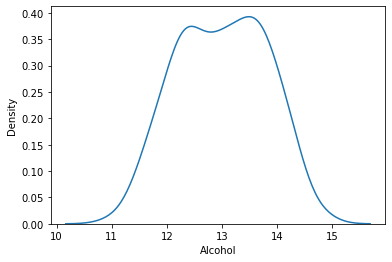

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

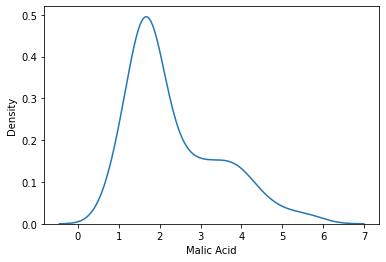

In [15]:
sns.kdeplot(data['Alcohol'])

plt.show()
plt.clf()
sns.kdeplot(data['Malic Acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

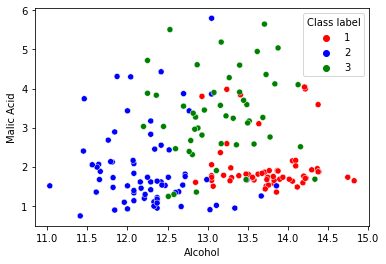

In [17]:
color_map = {1: 'red' , 2:'blue' , 3:'green'}
sns.scatterplot(x = data['Alcohol'] ,y = data['Malic Acid'],
               hue = data['Class label'] ,palette= color_map)

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train ,y_test = train_test_split(data.drop('Class label',axis = 1),
                                                     data['Class label'],
                                                     test_size = 0.3,
                                                     random_state=0)

X_train.shape , X_test.shape

((124, 2), (54, 2))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

scaler.fit(X_train)
X_train_scaled  = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled = pd.DataFrame(X_train_scaled ,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled ,columns = X_test.columns)

In [26]:
np.round(X_train.describe() , 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [27]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


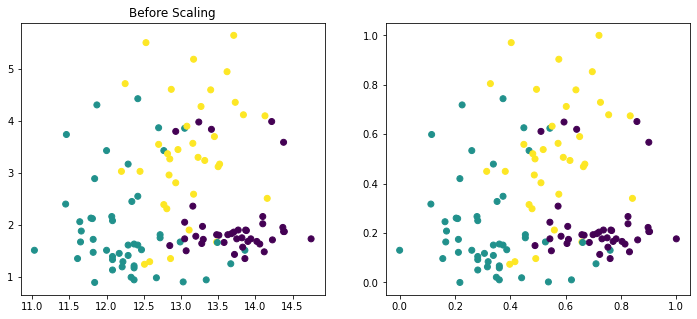

In [30]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

ax1.scatter(x = X_train['Alcohol'] , y = X_train['Malic Acid'] , c = y_train)
ax1.set_title('Before Scaling')
ax2.scatter(x = X_train_scaled['Alcohol'] , y = X_train_scaled['Malic Acid'] , c = y_train)

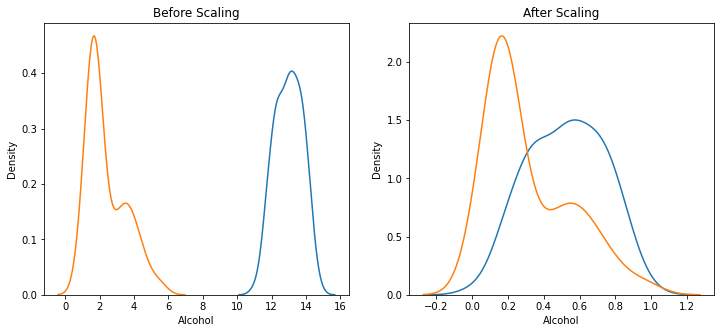

In [32]:
fig , (ax1 ,ax2) = plt.subplots(ncols=2 , figsize = (12,5))

sns.kdeplot(x = X_train['Alcohol'] , ax = ax1)
sns.kdeplot(x = X_train['Malic Acid'] , ax = ax1)
ax1.set_title('Before Scaling')

ax2.set_title("After Scaling")
sns.kdeplot(x = X_train_scaled['Alcohol'] ,ax = ax2)
sns.kdeplot(x = X_train_scaled['Malic Acid'] , ax =ax2)
plt.show()